## SVM for hand-written digit recognition

As an example of support vector machines in action, let's take a look at the hand-written digit recognition problem. We will use the MNIST dataset, which consists of several thousand gray scale images of hand-written digits. You can load directly the dataset with sklearn.

In [72]:
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [73]:
mnist = load_digits(n_class=10)

After downloading the dataset, print the general description of the dataset. Then print the target names and the shape of the images.

In [74]:
print(mnist.DESCR)
print(mnist.target_names)
print(mnist.images.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

Now print again the shape of `mnist.images` and `mnist.data`. What do you think is the relationship between them?

In [75]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [76]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [77]:
print(mnist.images.shape)
print(mnist.data.shape)

(1797, 8, 8)
(1797, 64)


`mnist.images.shape` = 8 x 8 numerical matrix representation of the images

`mnist.imags.data` = The numerical vector represenatation (dimensionality) of the images which = 64

Relationship = The `images` is the matrix representation of the image and the `data` is the flat represenation of the images 

In this exercise you should:

 - Visualize and present the dataset
 - Apply the SVC to perform multi-class classification
 - Comment on the usage of the different kernels and the effect of the hyper-parameters
 - Visualize the results with a confusion matrix
 - Create a grid with different test examples showing the predicted and the true label
 - Compute the accuracy score and comment on the results
 - Perform any other experiments that you can think of, always reason about the results!

## Visualize and present the dataset

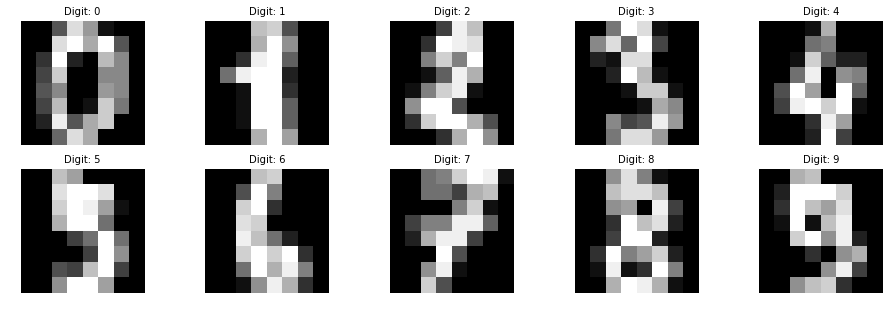

In [78]:
plt.figure(figsize=(16,5))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(mnist.images[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title('Digit: %i' % i, fontsize = 10)

In [79]:
df = pd.DataFrame(mnist['data'])
df['target'] = mnist['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Apply the SVC to perform multi-class classification

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [81]:
X=mnist.data
y=mnist.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

### Poly

In [82]:
clf = SVC(gamma=0.001, C=0.1, kernel='poly', random_state=0)
clf.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9865319865319865

In the this case we used the kernel `poly` with the parameter `gamma` = 0.001. This yields an good result.
The `gamma` parameter will expand the influence of one observation instead of using the default value of 1.
When we change the value of `gamma` to the default value of 1 or more the influence of one point decreases and the result gets worse.

We changed `C` to 0.1, increasing or decreasing the value of the parameter `C` further only gives worse results. `C` (the penalization parameter) in this case won't help getting better results. The higher `C`the more it will be influenced by outliers and the lower `C` the less it will be influenced by the outliers.

### Sigmoid

In [86]:
clf = SVC(gamma=0.001, C=2, kernel='sigmoid', random_state=0)
clf.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7356902356902357

In the this case we used the kernel `sigmoid` with the parameter `gamma` = 0.001. This yields an acceptable result.
The `gamma` parameter will expands the influence of one observation instead of using the default value of 1.
When we change the value of `gamma` to the default value of 1 or more the influence of one point decreases and the result gets worse.

We changed `C` to 2, increasing or decreasing the value of the parameter `C` further only gives worse results. `C` (the penalization parameter) in this case won't help getting better results. The higher `C`the more it will be influenced by outliers and the lower `C` the less it will be influenced by the outliers.

### RBF

In [88]:
clf = SVC(gamma=0.001, C=1, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9915824915824916

In the this case we used the default kernel `rbf` with the parameter `gamma` = 0.001. This yields the best result.
The `gamma` parameter will expands the influence of one observation instead of using the default value of 1.
When we change the value of `gamma` to the default value of 1 or more the influence of one point decreases and the result gets worse.

Increasing or decreasing the value of the parameter `C` only gives worse results. `C` (the penalization parameter) in this case won't help getting better results. The higher `C`the more it will be influenced by outliers and the lower `C` the less it will be influenced by the outliers.

In [90]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf','poly','sigmoid'), 'C':[0.1,1,2,3,4,5,10,15],'gamma': [1e-6,1e-5, 1e-4,1e-3,1e-2]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X,y)
clf.best_params_

{'C': 3, 'gamma': 0.001, 'kernel': 'rbf'}

In [91]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

To conclude, we also deployed grid search to have a more wholistic test for the hyperparameters. The `C` value show that we can limit certain flexible with mis-classified samples and have a slight higher value of 3. The Gridsearch  also further validates our test that kernel `rbf` performs best for this dataset. 

## Visualize the results with a confusion matrix

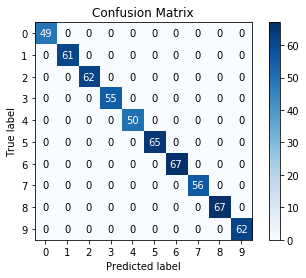

In [92]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred);

From the confusion metrics we see great accuracy and percision for our prediction. 

## Create a grid with different test examples showing the predicted and the true label

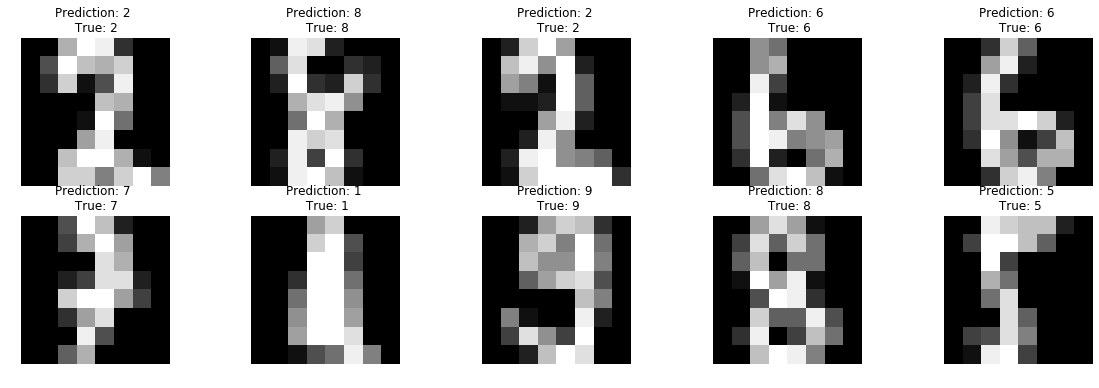

In [93]:
image=X_test.reshape(594,8,8)

plt.figure(figsize=(20,6))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(image[i], cmap=plt.get_cmap('gray'),interpolation='nearest')
    plt.axis('off')
    plt.title('Prediction: {} \n True: {}'.format(y_pred[i], y_test[i]))

## Compute the accuracy score and comment on the results

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, y_pred)

1.0

In [96]:
'The results are remarkebly amazing! It almost classifies all the data correctly ({0:.2%})'\
.format(accuracy_score(y_test, y_pred))

'The results are remarkebly amazing! It almost classifies all the data correctly (100.00%)'

## Perform any other experiments that you can think of, always reason about the results!

### LogisticRegression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr = LogisticRegression(random_state=0, C=0.1, penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
y_pred = lr.predict(X_test)

In [100]:
accuracy_score(y_test, y_pred)

0.9612794612794613

While using the logistic regression the accuracy score is still good but SVM with the `RBF` kernel is better. In this case it will use multiclass classification. We ajust the parameter `C` in this case like in SVM the regularization will be stronger than using the default value of 1. We also change the penalty parameter from `l2`(lower the influece of high beta's) to `l1` (only use the beta's which have the biggest influence, feature selection). We did this because certain pixels aren't used as much so the influence of these pixels should be lowered.

### Polynomial LogisticRegression

In [101]:
from sklearn.preprocessing import PolynomialFeatures

In [102]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [103]:
lr = LogisticRegression(random_state=0, C=10, penalty='l1', n_jobs=-1)
lr.fit(X_train_poly, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=0, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
y_pred = lr.predict(X_test_poly)

In [105]:
accuracy_score(y_test, y_pred)

0.9915824915824916

While using the logistic regression with polynomial features the accuracy score is the same as using the `RFB`kernel. In this case it will use multiclass classification. We ajust the parameter `C` in this case like in SVM the regularization will be less strong than using the default value of 1. We also change the penalty parameter from `l2`(lower the influece of high beta's) to `l1` (only use the beta's which have the biggest influence, feature selection). We did this because certain pixels aren't used as much so the influence of these pixels should be lowered.